MNIST:=IT IS A LARGE DATABASE OF HANDWITTEN DIGITS THAT IS COMMONLY USED FOR TRAINING VARIOUS IMAGE PROCESSING SYSTEM 

OUR GOAL IS TO IDENTIFY DIGITS FROM A DATASETS OF 10 THOUSANDS OF HANDWRITTEN IMAGE

In [ ]:
#importing modules
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import tensorflow as  tf
from tensorflow.keras.layers import Dropout,Flatten,Dense,Conv2D,MaxPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [ ]:
#for mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#The mnist_train.csv file contains the 60,000 training examples and labels. 
#The mnist_test.csv contains 10,000 test examples and labels. 
#Each row consists of 785 values: the first value is the label (a number from 0 to 9)
# and the remaining 784 values are the pixel values (a number from 0 to 255).

#Each image is 28 pixels in widht and 28 pixels in height so, total 784 pixels.
#each pixel has a single pixel values associated with it indicating  the 
#lightness and darkness of that pixels,with higher number means darker


train_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mnistdataset/mnist_train.csv')
test_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mnistdataset/mnist_test.csv')

In [ ]:
train_data.shape

(60000, 785)

In [ ]:
test_data.shape

(10000, 785)

In [ ]:
train_data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Splitiing data into features and level**

Creating Features

In [ ]:
x_train=train_data.drop('label',1)
#reshaping x_train
x_train=x_train.values.reshape(-1,28,28,1)
#normalizing x_train
x_train=tf.keras.utils.normalize(x_train,axis=1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


Creating Labels

In [ ]:
y_train=train_data['label']
y_train=to_categorical(y_train,num_classes=10)

**Creating model and compiling**

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation = 'relu', padding = 'Same', input_shape = (28, 28, 1)))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation = 'relu',  padding = 'Same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation = 'relu', padding = 'Same'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation = 'relu', padding = 'Same'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
#Add Flatten
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation = 'softmax'))



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        36928     
                                                        

In [ ]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#model fitting
history=model.fit(x_train,y_train,epochs=10,batch_size=1000)

Epoch 1/10
60/60 [==============================] - 15s 53ms/step - loss: 0.6737 - accuracy: 0.7859
Epoch 2/10
60/60 [==============================] - 3s 53ms/step - loss: 0.1306 - accuracy: 0.9599
Epoch 3/10
60/60 [==============================] - 3s 53ms/step - loss: 0.0855 - accuracy: 0.9731
Epoch 4/10
60/60 [==============================] - 3s 53ms/step - loss: 0.0669 - accuracy: 0.9793
Epoch 5/10
60/60 [==============================] - 3s 53ms/step - loss: 0.0569 - accuracy: 0.9819
Epoch 6/10
60/60 [==============================] - 3s 53ms/step - loss: 0.0478 - accuracy: 0.9847
Epoch 7/10
60/60 [==============================] - 3s 53ms/step - loss: 0.0387 - accuracy: 0.9877
Epoch 8/10
60/60 [==============================] - 3s 54ms/step - loss: 0.0354 - accuracy: 0.9886
Epoch 9/10
60/60 [==============================] - 3s 53ms/step - loss: 0.0317 - accuracy: 0.9896
Epoch 10/10
60/60 [==============================] - 3s 53ms/step - loss: 0.0282 - accuracy: 0.9909


In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
y_train.shape

(60000, 10)

**saving our model**

In [ ]:
model_json=model.to_json()
with open('/content/drive/MyDrive/Colab Notebooks/mnistdataset/model.json','w') as json_file:
  json_file.write(model_json)
  

**tesing our model**

In [ ]:
x_test=test_data.drop('label',1)
x_test=x_test.values.reshape(-1,28,28,1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
prediction=model.predict(x_test)

The Predicted number is: 7


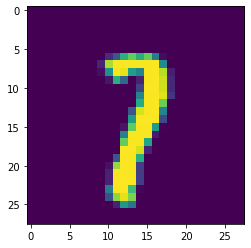

In [ ]:
prediction=np.argmax(prediction,axis=1)
plt.imshow(x_test[111].reshape(28,28))
print('The Predicted number is: '+str(prediction[111]))

The Predicted number is: 6


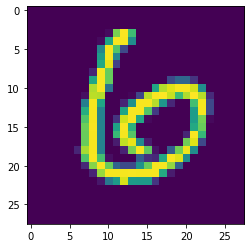

In [ ]:
plt.imshow(x_test[11].reshape(28,28))
print('The Predicted number is: '+str(prediction[11]))

In [ ]:
y_test=test_data['label']
y_test=to_categorical(y_test,num_classes=10)

**finding accuracy**

In [ ]:
score=model.evaluate(x_test,y_test,verbose=0)

In [ ]:
# model accuracy
print("Accuracy:%.2f%%" % (score[1]*100))

Accuracy:98.73%


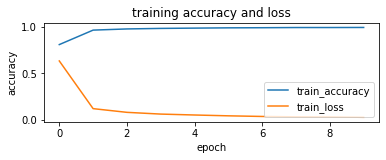

In [ ]:
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('training accuracy and loss' )
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'train_loss'], loc='lower right')

In [ ]:
prediction.shape

(10000,)

In [ ]:
y_test.shape

(10000, 10)

In [ ]:
y_test[:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
prediction[:5]

array([7, 2, 1, 0, 4])

In [ ]:
y_test=np.argmax(y_test,axis=1)

In [ ]:
y_test[:5]

array([7, 2, 1, 0, 4])

showing the confusion matrix

In [ ]:
matrix=tf.math.confusion_matrix(labels=y_test,predictions=prediction)
matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 977,    0,    0,    0,    0,    0,    2,    1,    0,    0],
       [   0, 1135,    0,    0,    0,    0,    0,    0,    0,    0],
       [   1,    2, 1019,    0,    1,    0,    1,    7,    1,    0],
       [   0,    0,    0,  998,    0,    7,    0,    3,    1,    1],
       [   1,    2,    0,    0,  958,    0,    4,    1,    2,   14],
       [   2,    1,    0,    3,    0,  879,    3,    1,    2,    1],
       [   1,    3,    0,    0,    2,    0,  952,    0,    0,    0],
       [   0,    8,    1,    0,    0,    0,    0, 1017,    1,    1],
       [   3,    0,    2,    1,    0,    1,    0,    0,  963,    4],
       [   0,    6,    0,    1,    1,    2,    0,    6,    1,  992]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

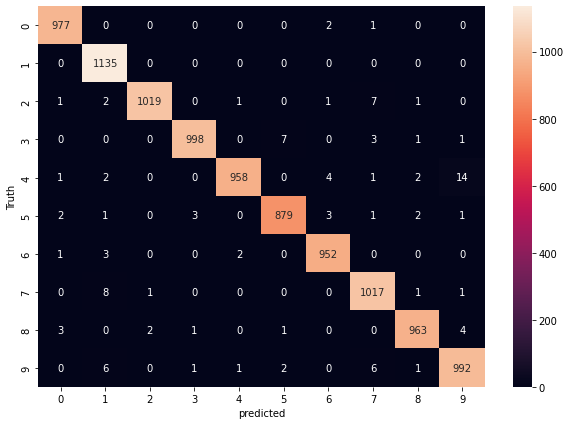

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(matrix,annot=True,fmt="d")
plt.xlabel('predicted')
plt.ylabel('Truth')

# **IMPLEMENTNING GUI USING TKINTER**

In [ ]:
model.save_weights('/content/drive/MyDrive/Colab Notebooks/mnistdataset/model.h5')

In [ ]:
from tensorflow.keras.models import model_from_json
json_file=open('/content/drive/MyDrive/Colab Notebooks/mnistdataset/model.json','r')
load_model_json=json_file.read()
json_file.close()
loaded_model=model_from_json(load_model_json)
loaded_model.load_weights('/content/drive/MyDrive/Colab Notebooks/mnistdataset/model.h5')
model=loaded_model

In [ ]:
import tkinter as tk
from PIL import ImageTk,Image,ImageDraw


In [ ]:



def event_function(event):
    
    x=event.x
    y=event.y
    
    x1=x-30
    y1=y-30
    
    x2=x+30
    y2=y+30

    canvas.create_oval((x1,y1,x2,y2),fill='black')
    img_draw.ellipse((x1,y1,x2,y2),fill='white')

def save():
    
    global count
    
    img_array=np.array(img)
    img_array=cv2.resize(img_array,(28,28))
    
    cv2.imwrite(str(count)+'.jpg',img_array)
    count=count+1

def clear():
    
    global img,img_draw
    
    canvas.delete('all')
    img=Image.new('RGB',(500,500),(0,0,0))
    img_draw=ImageDraw.Draw(img)    
    
    label_status.config(text='PREDICTED DIGIT: NONE')

def predict():
    
    img_array=np.array(img)
    img_array=cv2.cvtColor(img_array,cv2.COLOR_RGB2GRAY)
    img_array=cv2.resize(img_array,(28,28))
    
    img_array=img_array/255.0
    img_array=img_array.reshape(1,28,28)
    result=model.predict(img_array)
    label=np.argmax(result,axis=1)
    
    label_status.config(text='PREDICTED DIGIT:'+str(label))
    
count=0
    
win=tk.Tk()

canvas=tk.Canvas(win,width=500,height=500,bg='white')
canvas.grid(row=0,column=0,columnspan=4)

button_save=tk.Button(win,text='SAVE',bg='green',fg='white',font='Helvetica 20 bold',command=save)
button_save.grid(row=1,column=0)

button_predict=tk.Button(win,text='PREDICT',bg='blue',fg='white',font='Helvetica 20 bold',command=predict)
button_predict.grid(row=1,column=1)

button_clear=tk.Button(win,text='CLEAR',bg='yellow',fg='white',font='Helvetica 20 bold',command=clear)
button_clear.grid(row=1,column=2)

button_exit=tk.Button(win,text='EXIT',bg='red',fg='white',font='Helvetica 20 bold',command=win.destroy)
button_exit.grid(row=1,column=3)

label_status=tk.Label(win,text='PREDICTED DIGIT: NONE',bg='white',font='Helvetica 24 bold')
label_status.grid(row=2,column=0,columnspan=4)

canvas.bind('<B1-Motion>',event_function)
img=Image.new('RGB',(500,500),(0,0,0))
img_draw=ImageDraw.Draw(img)

win.mainloop()

TclError: ignored